# Losowanie z wielowymiarowego rozkładu normalnego

In [87]:
import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import matplotlib.pyplot as plt
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid
from scipy.stats import multivariate_normal

# Zadanie 
Wylosuj dane z rozkładu normalnego o parametrach
- $m =[0,0]$
- $ \Sigma = [[3.40, -2.75], [-2.75,  5.50]]$


<b>
PAMIĘTAJ, ŻE $\Sigma$ MUSI BYĆ MACIERZĄ SYMETRYCZNĄ I DODATNIO OKREŚLONĄ.
</b>

In [88]:
r = np.array([[3.40, -2.75], [-2.75,  5.50]])

### Najpierw losujemy próbkę z rozkładu $N([0,0],I)$, gdzie $I$ to macierz identycznościowa.

In [ ]:
num_samples = 400
x = norm.rvs(size=(2, num_samples))

Szukamy takiego $A$ aby 

$$
\Sigma = A^T A.
$$

Aby obliczyć "pierwiastek" $A$ z macierzy kowariancji $\Sigma$ można skorzystać z gotowych metod numerycznych - Rozkład Choleskiego.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.cholesky.html

In [83]:
# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))


### Generujemy naszą próbkę.

In [84]:
data = np.dot(c, x)
c

array([[ 1.84390889,  0.        ],
       [-1.4913969 ,  1.80989925]])

### Narysuj poziomice rozkładu normalnego dla 

- $N([0,0],c)$
- $N([0,0],np.cov(data))$

aby sprawdzić czy dostaliśmy dobrą próbkę.

[[ 3.4  -2.75]
 [-2.75  5.5 ]]
[[ 3.21220222 -2.50698696]
 [-2.50698696  5.7399055 ]]


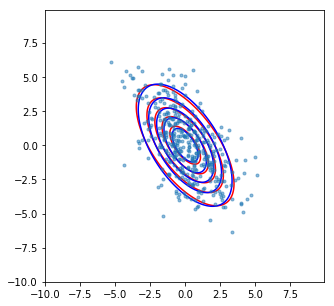

In [92]:
mean1 = np.array([0, 0])
#rv1 = multivariate_normal(mean1, c)
rv2 = multivariate_normal(mean1, r)
rv3 = multivariate_normal(mean1, np.cov(data))
#print(c)
print(r)
print(np.cov(data))

data1 = multivariate_normal(mean1, r).rvs(1000)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.plot(data[0,:],data[1,:],".", alpha=.5)
#ax.plot(data1[:,0],data1[:,1],".", alpha=.5)
x, y = np.mgrid[-10:10:.1, -10:10:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
#ax.contour(x, y, rv1.pdf(pos), 6, colors = 'k')
ax.contour(x, y, rv2.pdf(pos), 6, colors = 'r')
ax.contour(x, y, rv3.pdf(pos), 6, colors = 'b')
plt.show()
plt.show()